# Esercitazione: Analisi di Clustering su Dataset di Vini sfruttando PCA

## Introduzione
Questa esercitazione esplora tecniche di apprendimento non supervisionato applicate all'analisi dei vini. Combiniamo l'analisi delle componenti principali (PCA) con algoritmi di clustering per identificare modelli naturali nelle caratteristiche chimiche dei vini, ottimizzando i risultati attraverso l'analisi del coefficiente di Silhouette o algoritmo Elbow.

## Obiettivi
1. Applicare la PCA per ridurre la dimensionalità e identificare le componenti che spiegano la maggior parte della varianza nei dati
2. Determinare il numero ottimale di cluster utilizzando il coefficiente di Silhouette o Elbow
3. Eseguire il clustering K-means sulle componenti principali e interpretare i risultati
4. Caratterizzare i cluster identificati in termini delle feature originali del vino

## Dataset
Il dataset contiene misurazioni di 13 attributi chimici di diversi vini italiani. Questi attributi includono il contenuto di alcol, acido malico, cenere, alcalinità della cenere, magnesio, fenoli totali, flavonoidi, fenoli non flavonoidi, proantocianidine, intensità del colore, tonalità, OD280/OD315 e prolina. Il dataset è spesso utilizzato per il riconoscimento di pattern e la classificazione in machine learning, ma in questa esercitazione lo utilizzeremo per tecniche non supervisionate.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("datasets/wine-clustering.csv")
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

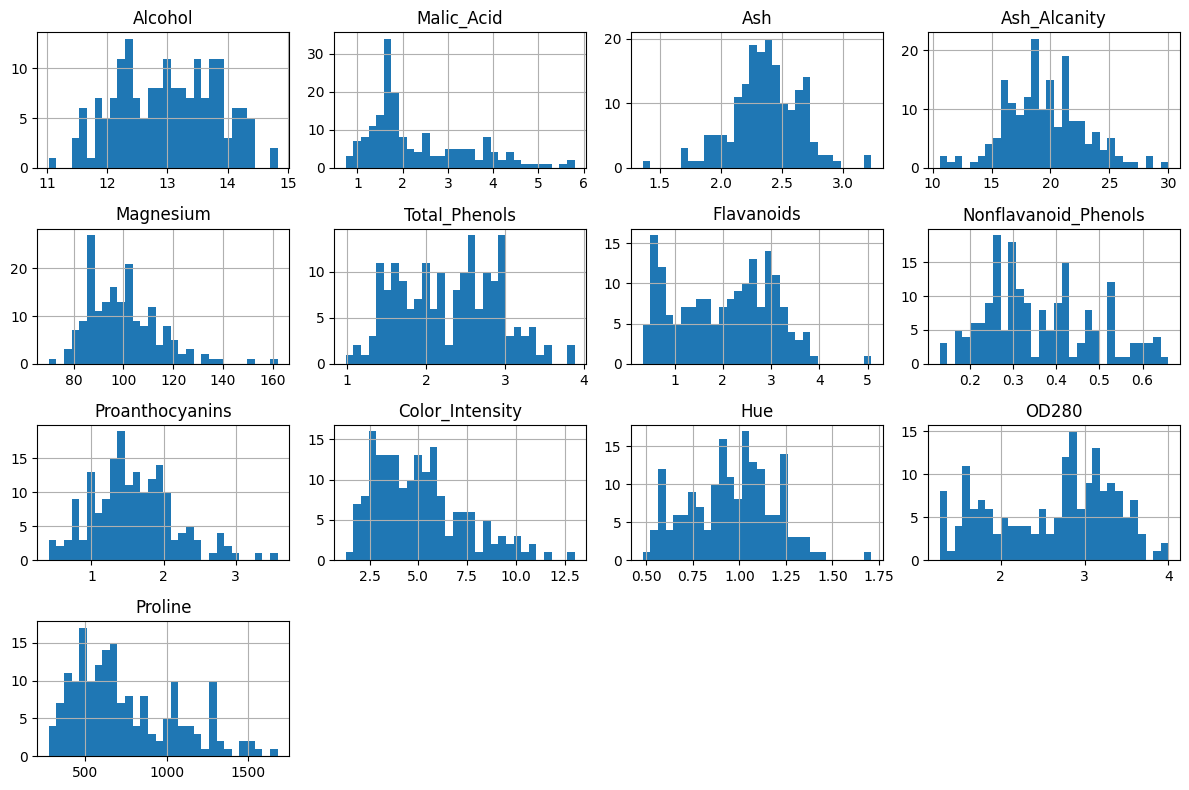

In [6]:
df.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

<Axes: >

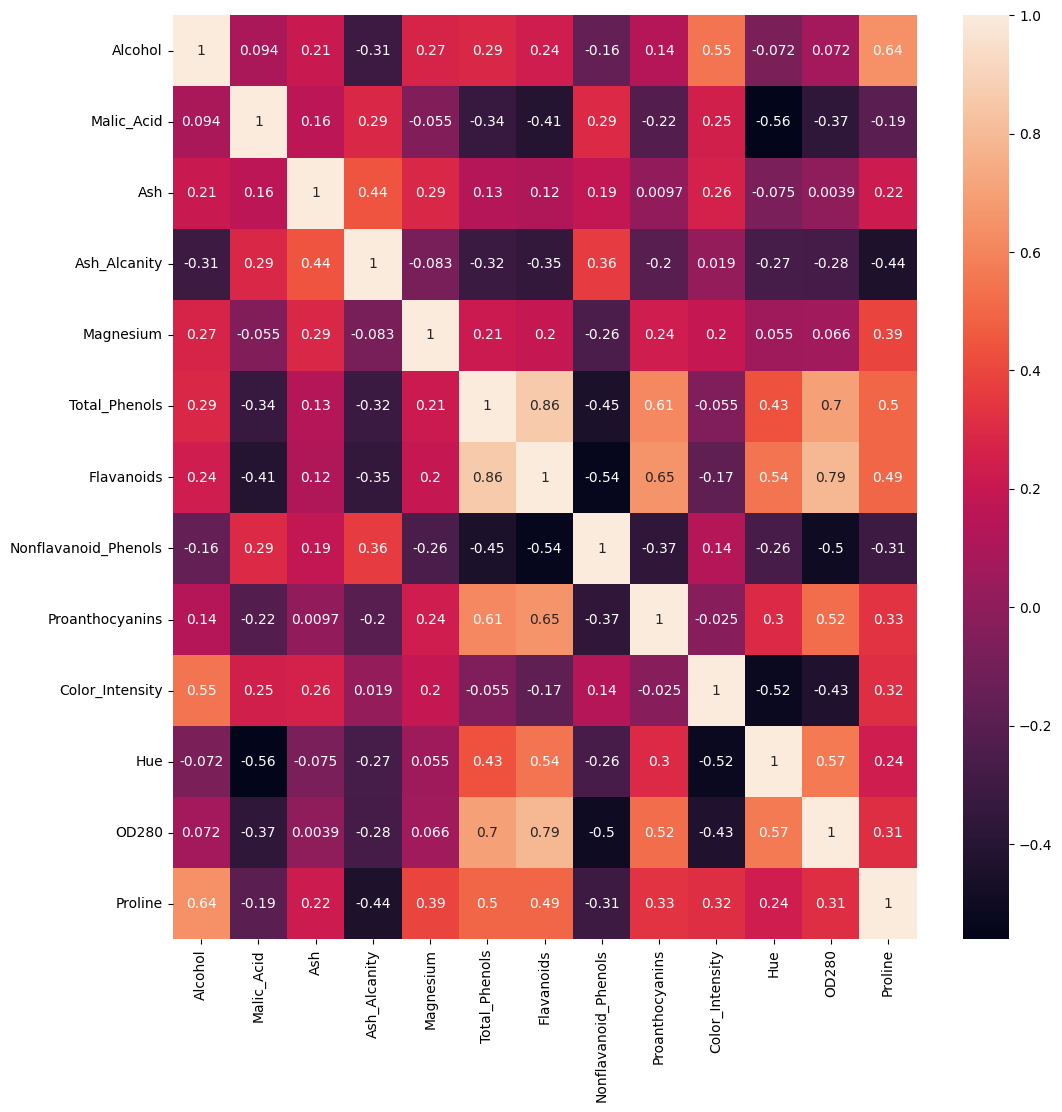

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [8]:
scaler=StandardScaler()
scaler.fit(df)
data_scaled=scaler.transform(df)

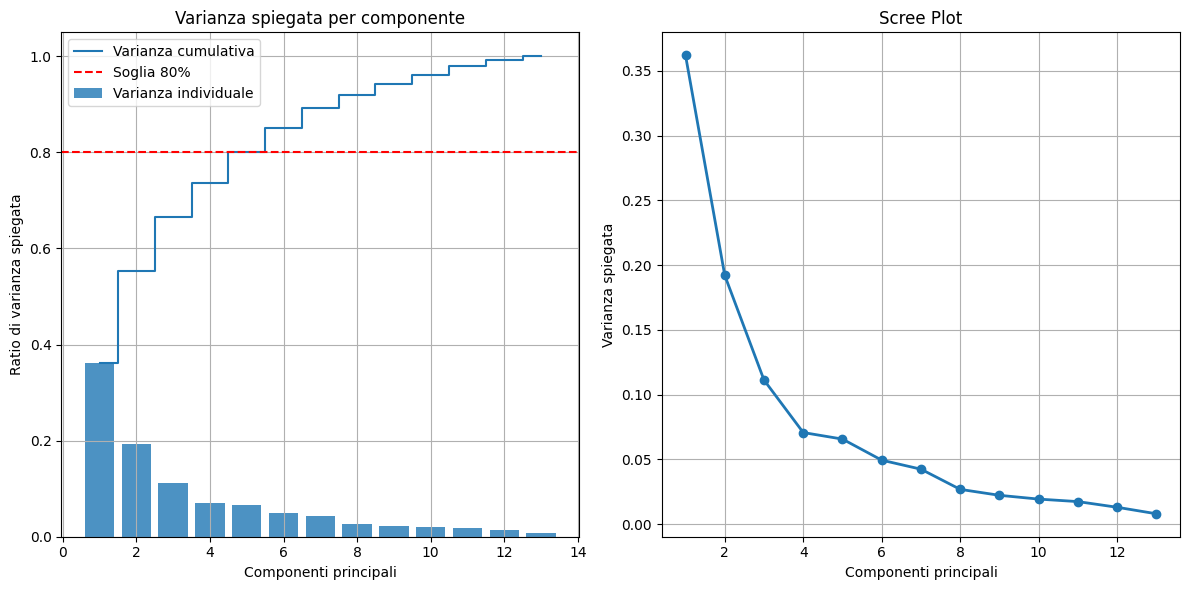

Numero di componenti che spiegano almeno l'80% della varianza: 5
Percentuale esatta di varianza spiegata con 5 componenti: 80.16%


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Analisi della varianza spiegata
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Creazione di un dataframe per i risultati della PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Visualizzazione della varianza spiegata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, label='Varianza individuale')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza cumulativa')
plt.axhline(y=0.8, color='r', linestyle='--', label='Soglia 80%')
plt.ylabel('Ratio di varianza spiegata')
plt.xlabel('Componenti principali')
plt.title('Varianza spiegata per componente')
plt.legend(loc='best')
plt.grid(True)

# Scree plot - un altro modo per visualizzare la varianza spiegata
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Componenti principali')
plt.ylabel('Varianza spiegata')
plt.grid(True)
plt.tight_layout()
plt.show()

# Determinare il numero di componenti che spiegano almeno l'80% della varianza
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Numero di componenti che spiegano almeno l'80% della varianza: {n_components}")
print(f"Percentuale esatta di varianza spiegata con {n_components} componenti: {cumulative_variance[n_components-1]*100:.2f}%")

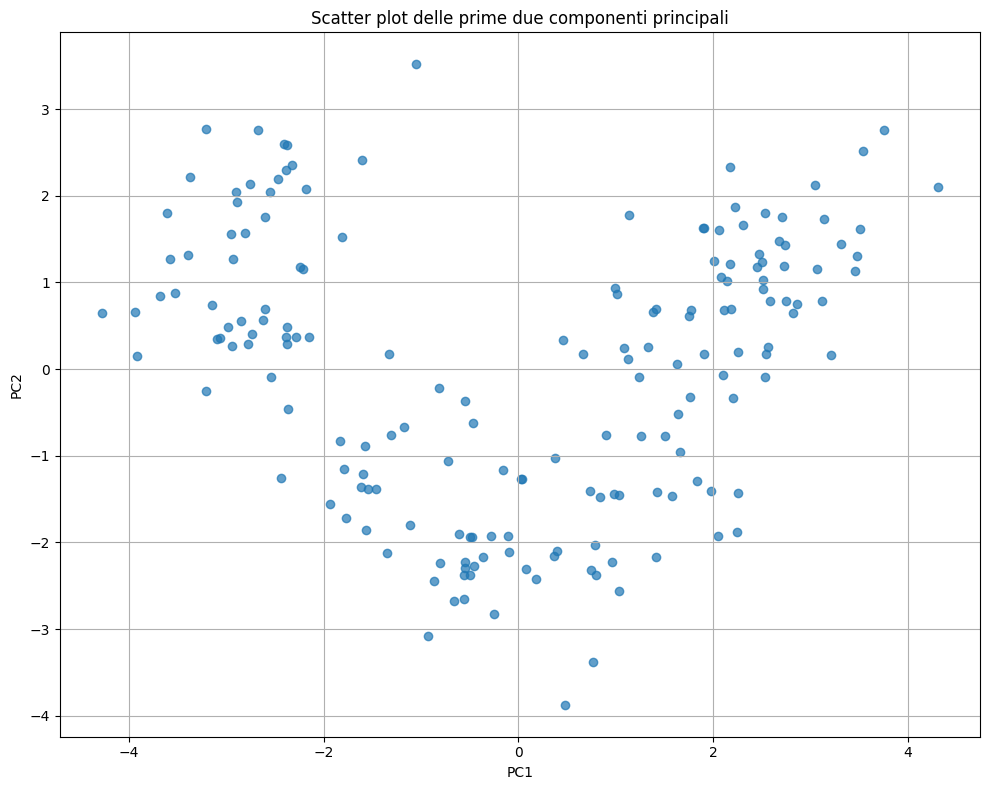

In [11]:
# Riduciamo la dimensionalità al numero di componenti selezionate
pca_reduced = PCA(n_components=n_components)
principal_components = pca_reduced.fit_transform(data_scaled)

# Creazione di un DataFrame con le componenti principali
pc_df = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Visualizzazione delle prime due componenti principali
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7)
plt.title('Scatter plot delle prime due componenti principali')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

k=2 - Inerzia: 1201.16, Silhouette: 0.3239
k=3 - Inerzia: 825.02, Silhouette: 0.3691
k=4 - Inerzia: 723.94, Silhouette: 0.3256
k=5 - Inerzia: 663.99, Silhouette: 0.2645
k=6 - Inerzia: 605.38, Silhouette: 0.2728
k=7 - Inerzia: 558.11, Silhouette: 0.2756
k=8 - Inerzia: 524.52, Silhouette: 0.2257
k=9 - Inerzia: 474.11, Silhouette: 0.2240
k=10 - Inerzia: 451.06, Silhouette: 0.2124


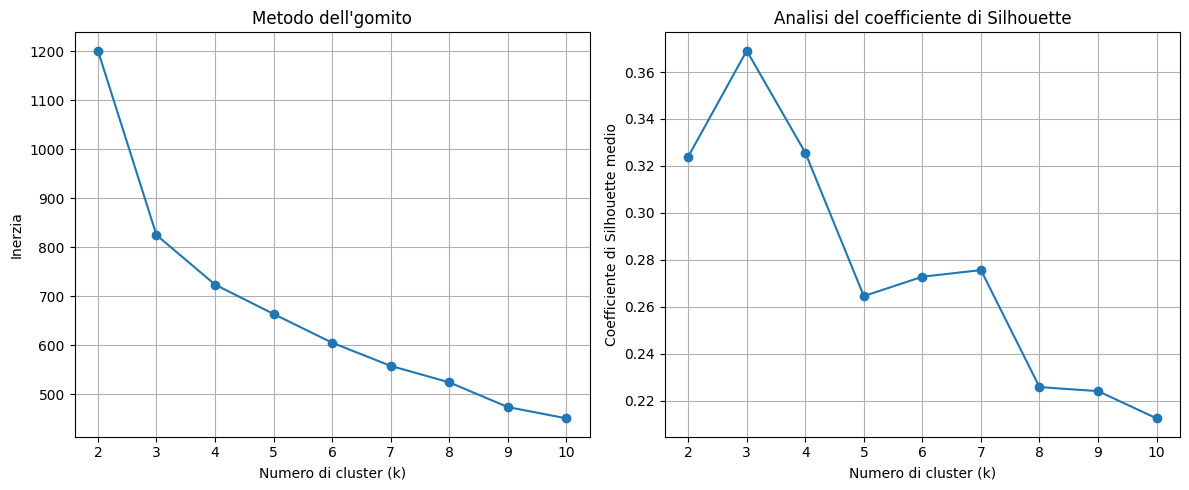

In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples
# Calcolo dell'inerzia (Elbow Method) e del coefficiente di Silhouette per diversi valori di k
range_n_clusters = range(2, 11)
inertia_list = []
silhouette_avg_list = []

for k in range_n_clusters:
    # Addestramento del modello KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pc_df)
    
    # Salvataggio dell'inerzia
    inertia_list.append(kmeans.inertia_)
    
    # Calcolo del coefficiente di Silhouette
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(pc_df, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    
    print(f"k={k} - Inerzia: {kmeans.inertia_:.2f}, Silhouette: {silhouette_avg:.4f}")

# Visualizzazione del metodo dell'gomito
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia_list, marker="o")
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Inerzia")
plt.title("Metodo dell'gomito")
plt.grid(True)

# Visualizzazione del coefficiente di Silhouette
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg_list, marker="o")
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Coefficiente di Silhouette medio")
plt.title("Analisi del coefficiente di Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()

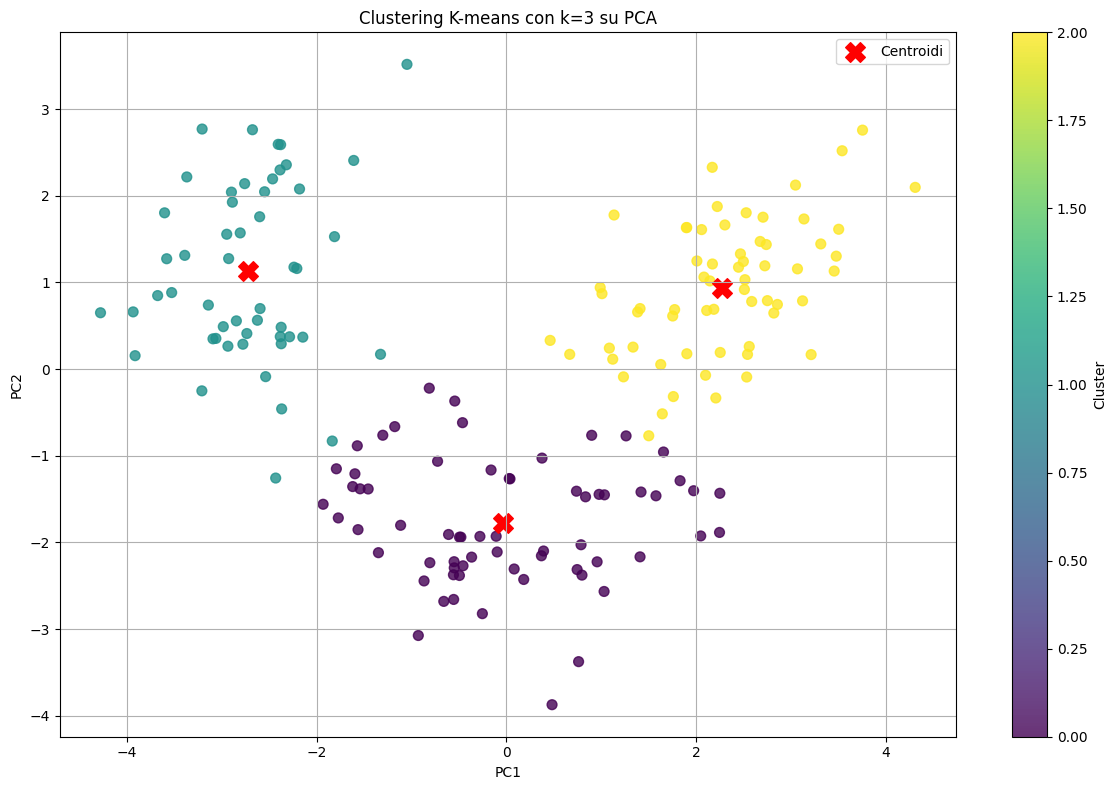

In [14]:
# Esecuzione del clustering K-means con il numero ottimale di cluster
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels_final = kmeans_final.fit_predict(principal_components)

# Aggiungiamo i cluster al DataFrame originale e al DataFrame delle componenti principali
df['Cluster'] = cluster_labels_final
pc_df['Cluster'] = cluster_labels_final

# Visualizzazione dei cluster nelle prime due componenti principali
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['Cluster'], 
                     cmap='viridis', s=50, alpha=0.8)
plt.title(f'Clustering K-means con k={optimal_k} su PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')

# Aggiungiamo i centroidi
centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='red', label='Centroidi')
plt.legend()
plt.tight_layout()
plt.show()

Media delle feature originali per cluster:
           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.69

<Figure size 1500x800 with 0 Axes>

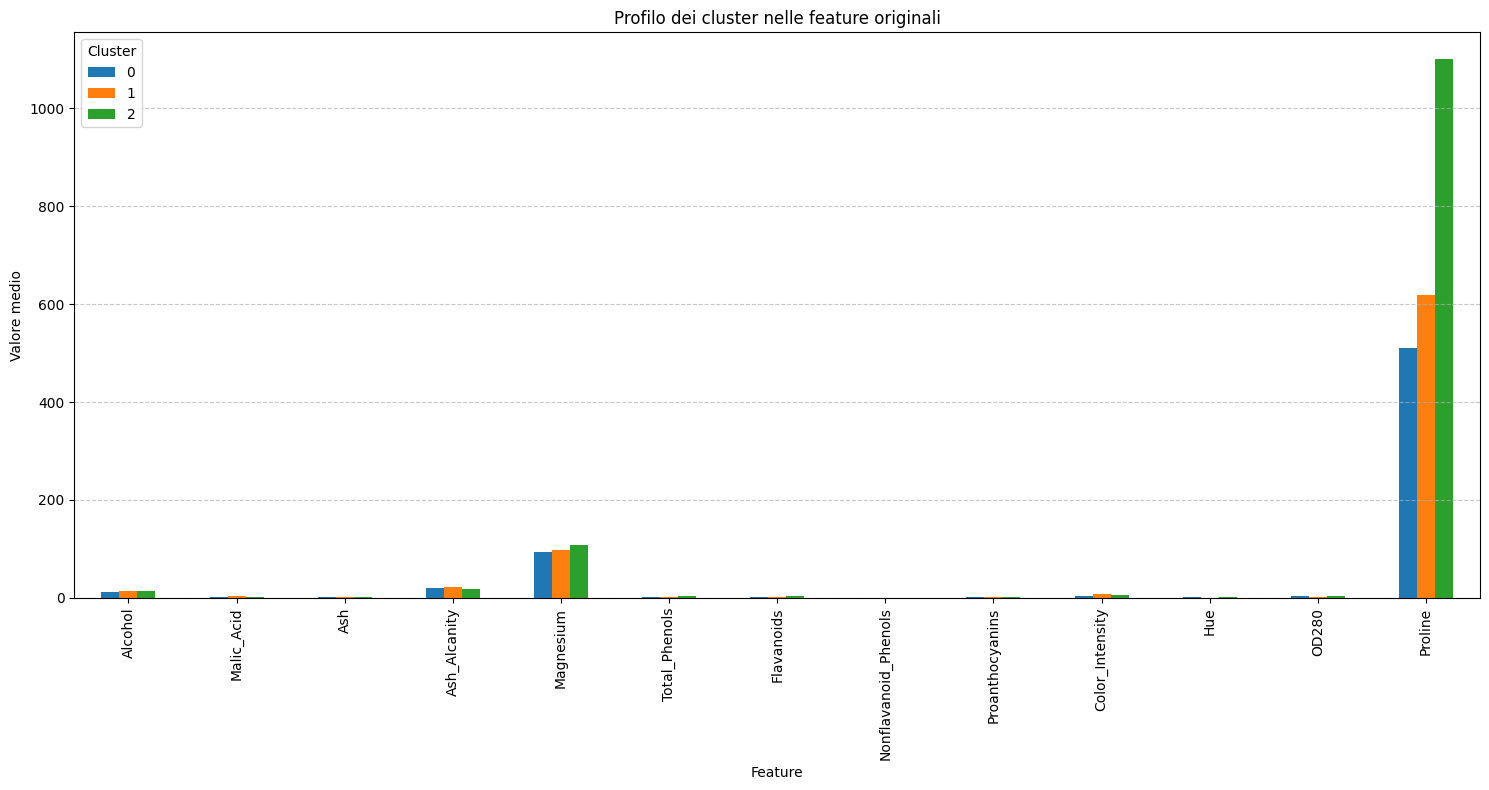

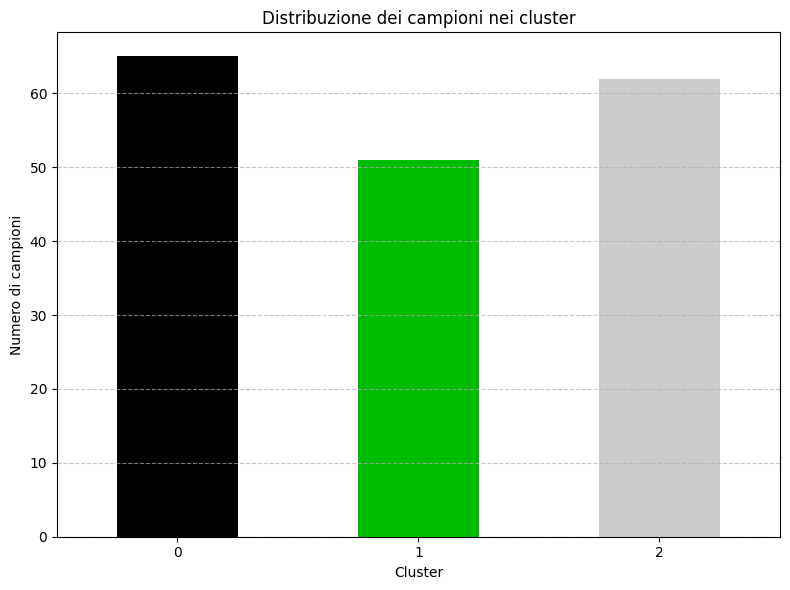

In [16]:
import matplotlib.cm as cm
# Statistiche dei cluster nelle feature originali
cluster_stats = df.groupby('Cluster').mean()
print("Media delle feature originali per cluster:")
print(cluster_stats)

# Visualizzazione del profilo dei cluster
plt.figure(figsize=(15, 8))
cluster_stats.T.plot(kind='bar', figsize=(15, 8))
plt.title('Profilo dei cluster nelle feature originali')
plt.ylabel('Valore medio')
plt.xlabel('Feature')
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualizzazione della distribuzione dei cluster
plt.figure(figsize=(8, 6))
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color=cm.nipy_spectral(np.linspace(0, 1, optimal_k)))
plt.title('Distribuzione dei campioni nei cluster')
plt.xlabel('Cluster')
plt.ylabel('Numero di campioni')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Cluster 2 (verde): Rappresenta vini con un contenuto di Proline molto alto. Probabilmente rappresenta vini di una varietà specifica o di una regione particolare che tende a produrre uve con alto contenuto di prolina.
- Cluster 1 (arancione): Vini con contenuto medio di Proline. Potrebbe rappresentare una categoria intermedia di vini.
- Cluster 0 (blu): Vini con il contenuto più basso di Proline. Potrebbe rappresentare una varietà di vino diversa o vini prodotti con tecniche diverse.

C:\Users\luigi\AppData\Local\Temp\ipykernel_17628\3833210754.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature1, data=df, palette='viridis')
C:\Users\luigi\AppData\Local\Temp\ipykernel_17628\3833210754.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PC1', data=pc_df, palette='viridis')


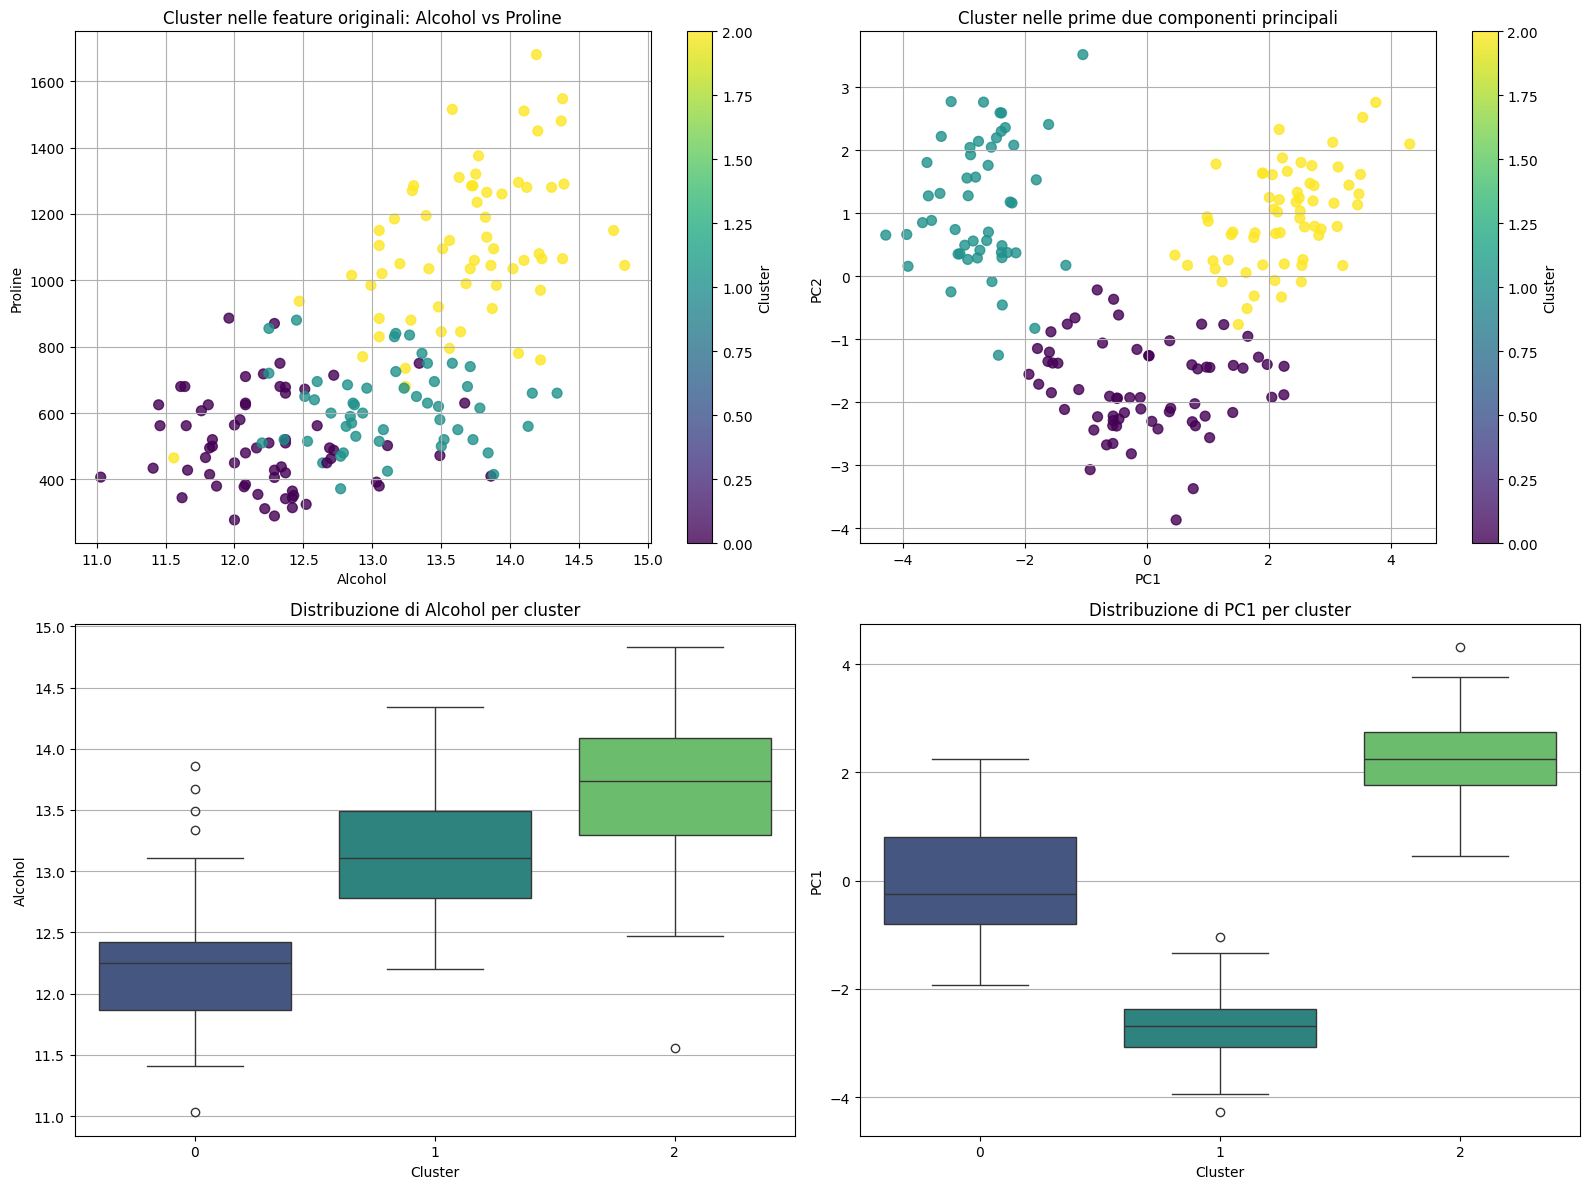

In [ ]:
# Creazione di una visualizzazione multipla per confrontare feature originali e componenti principali
plt.figure(figsize=(16, 12))

# Feature originali significative (scegliamo due feature correlate con le prime PC)
feature1 = 'Alcohol'
feature2 = 'Proline' 

# Distribuzione nei cluster usando le feature originali
plt.subplot(2, 2, 1)
scatter_orig = plt.scatter(df[feature1], df[feature2], c=df['Cluster'], 
                          cmap='viridis', s=50, alpha=0.8)
plt.title(f'Cluster nelle feature originali: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.colorbar(scatter_orig, label='Cluster')

# Distribuzione nei cluster usando le prime due componenti principali
plt.subplot(2, 2, 2)
scatter_pc = plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['Cluster'], 
                        cmap='viridis', s=50, alpha=0.8)
plt.title('Cluster nelle prime due componenti principali')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(scatter_pc, label='Cluster')

# Distribuzione di una feature originale per cluster
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y=feature1, data=df, palette='viridis')
plt.title(f'Distribuzione di {feature1} per cluster')
plt.grid(True, axis='y')

# Distribuzione di PC1 per cluster
plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='PC1', data=pc_df, palette='viridis')
plt.title('Distribuzione di PC1 per cluster')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()